In [1]:
import matplotlib.pyplot as plt
from seaborn import distplot as dist
from scipy import signal
from scipy.io import wavfile
import numpy as np

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
# Importing raw sound data
sample_rate, samples = wavfile.read('inspiration_data.wav')

# Converting the time to hours
hours = ((len(samples) / sample_rate) / 60 / 60)
time_in_hours = np.linspace(0, hours, len(samples))

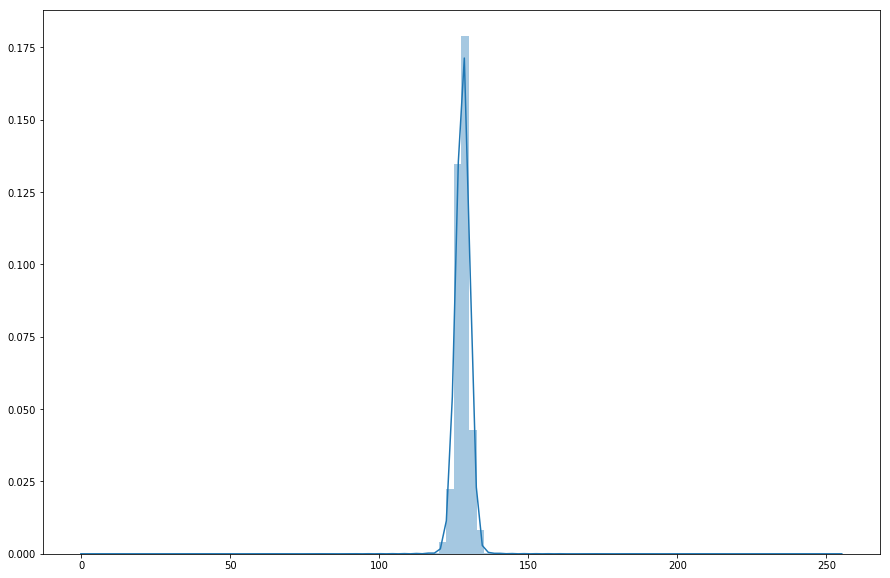

In [3]:
# Viewing a distribution of the sound values
plt.figure(figsize = (15, 10))
dist(samples, bins = 100);

In [4]:
# Calculating the mean and standard deviation to get extreme values
stand_dev = np.std(samples)
mean = np.mean(samples)

extreme_value = mean + 2*stand_dev
print('A sound value of at least %0.6f qualifies as an extreme value' % extreme_value)

# Getting an idea of how many extremes there are
extreme_indicator = (samples >= extreme_value)
extreme_count = np.sum(extreme_indicator)
print('There are %0.6f of these extreme values' % extreme_count)

# Translating those to understandable amounts of time
extreme_proportion = (extreme_count / len(extreme_indicator))
print('Which account for %0.6f percent of all measured values' % extreme_proportion)

minutes_of_extremes = (hours * extreme_proportion * 60)
print('This translates to %0.6f minutes of extreme values' % minutes_of_extremes)

A sound value of at least 132.992298 qualifies as an extreme value
There are 2589255.000000 of these extreme values
Which account for 0.022721 percent of all measured values
This translates to 5.394281 minutes of extreme values


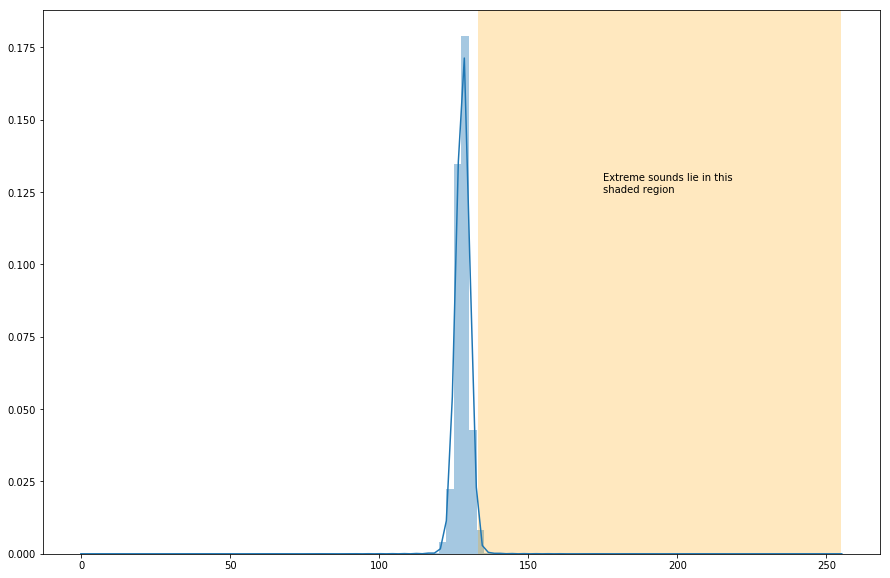

In [5]:
# Showing where the extreme values lie on the distribution
plt.figure(figsize = (15, 10))
dist(samples, bins = 100)
plt.text(175, .125, 'Extreme sounds lie in this\nshaded region')
plt.axvspan(extreme_value, samples.max(), color='orange', alpha=0.25, lw=0);

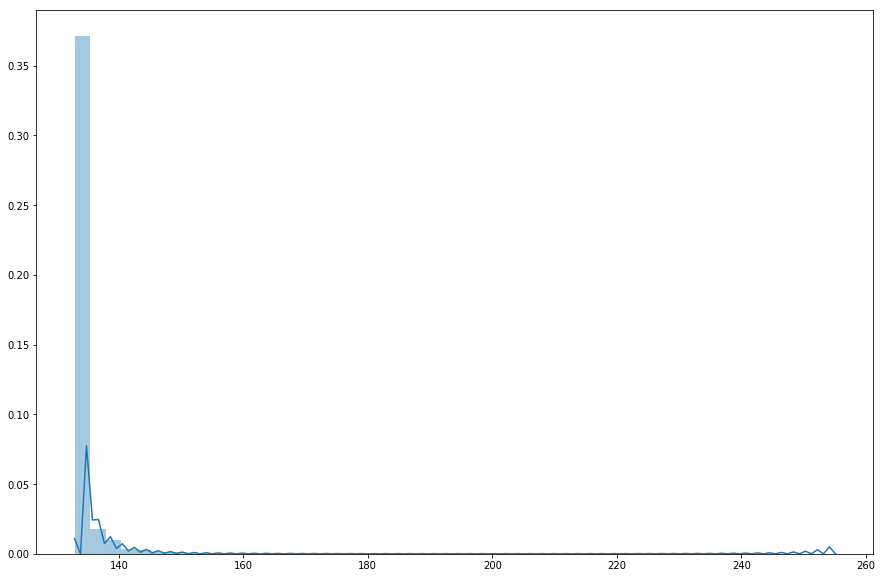

In [6]:
# Getting the loudest moments
loud_indices = np.argsort(-1 * samples)

# Making lists to append to
loud_times_in_hours = []
loud_values_in_hours = []

# Of the loudest moments, only considering the amount that qualify as extreme loud
for index in loud_indices[0:extreme_count]:
    
    # Storing the time in hours of the extreme sound
    loud_time_in_hours = time_in_hours[index]
    loud_times_in_hours.append(loud_time_in_hours)
    
    # Storing the corresponding sound value of the extreme sound
    loud_value_in_hours = samples[index]
    loud_values_in_hours.append(loud_value_in_hours)

# Plotting the distribution of these extreme sounds
plt.figure(figsize = (15, 10))
dist(loud_values_in_hours);

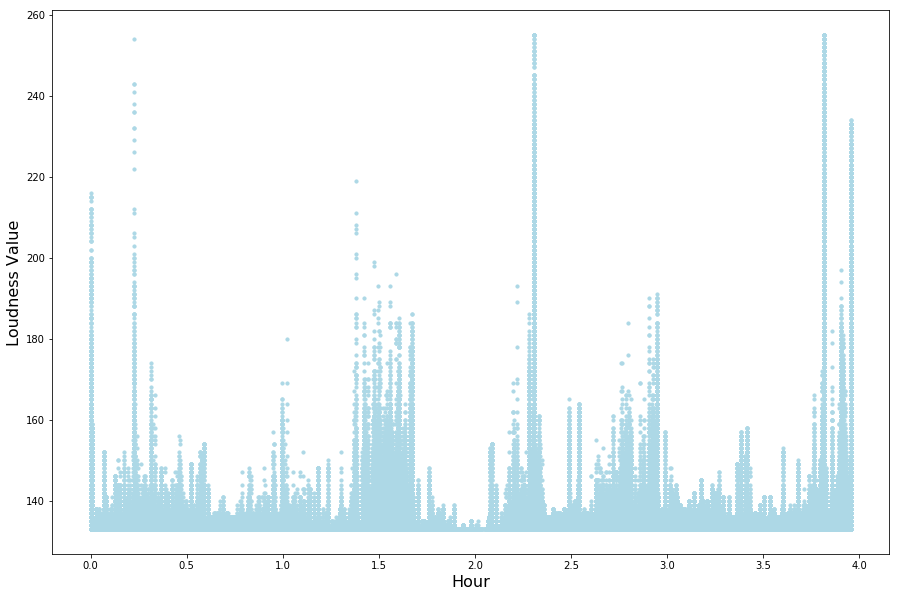

In [7]:
# Plotting when these extreme sounds occured and how loud they were
plt.figure(figsize = (15, 10))
plt.scatter(loud_times_in_hours, loud_values_in_hours, s = 10, color = 'lightblue')
plt.xlabel('Hour', fontsize = 16)
plt.ylabel('Loudness Value', fontsize = 16);